(dyn_stack)=
```{raw} html
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Dynamic Stackelberg Problems

```{contents} Contents
:depth: 2
```

This notebook formulates and computes a plan that a **Stackelberg
leader** uses to manipulate forward-looking decisions of a **Stackelberg
follower** that depend on continuation sequences of decisions made once
and for all by the Stackelberg leader at time $0$.

To facilitate computation and interpretation, we formulate things in a
context that allows us to apply linear optimal dynamic programming.

From the beginning we carry along a linear-quadratic model of duopoly in
which firms face adjustment costs that make them want to forecast
actions of other firms that influence future prices.

## Duopoly

Time is discrete and is indexed by $t = 0, 1, \ldots$.

Two firms produce a single good whose demand is governed by the linear
inverse demand curve

$$
p_t = a_0 - a_1 (q_{1t}+ q_{2t} )
$$

where $q_{it}$ is output of firm $i$ at time $t$ and
$a_0$ and $a_1$ are both positive.

$q_{10}, q_{20}$ are given numbers that serve as initial
conditions at time $0$.

By incurring a cost of change

$$
\gamma v_{it}^2
$$

where $\gamma > 0$, firm $i$ can change its output according
to

$$
q_{it+1} = q_{it} + v_{it}
$$

Firm $i$'s profits at time $t$ equal

$$
\pi_{it} = p_t q_{it} - \gamma v_{it}^2
$$

Firm $i$ wants to maximize the present value of its profits

$$
\sum_{t=0}^\infty \beta^t \pi_{it}
$$

where $\beta \in (0,1)$ is a time discount factor.

### Stackelberg Leader and Follower

Each firm $i=1,2$ chooses a sequence
$\vec q_i \equiv \{q_{it+1}\}_{t=0}^\infty$ once and for all at
time $0$.

We let firm 2 be a **Stackelberg leader** and firm 1 be a **Stackelberg
follower**.

The leader firm 2 goes first and chooses
$\{q_{2t+1}\}_{t=0}^\infty$ once and for all at time $0$.

Knowing that firm 2 has chosen $\{q_{2t+1}\}_{t=0}^\infty$, the
follower firm 1 goes second and chooses
$\{q_{1t+1}\}_{t=0}^\infty$ once and for all at time $0$.

In choosing $\vec q_2$, firm 2 takes into account that firm 1 will
base its choice of $\vec q_1$ on firm 2's choice of
$\vec q_2$.

### Abstract Statement of the Leader's and Follower's Problems

We can express firm 1's problem as

$$
\max_{\vec q_1} \Pi_1(\vec q_1; \vec q_2)
$$

where the appearance behind the semi-colon indicates that
$\vec q_2$ is given.

Firm 1's problem induces a best response mapping

$$
\vec q_1 = B(\vec q_2)
$$

(Here $B$ maps a sequence into a sequence)

The Stackelberg leader's problem is

$$
\max_{\vec q_2} \Pi_2 (B(\vec q_2), \vec q_2)
$$

whose maximizer is a sequence $\vec q_2$ that depends on the
initial conditions $q_{10}, q_{20}$ and the parameters of the
model $a_0, a_1, \gamma$.

This formulation captures key features of the model

- Both firms make once-and-for-all choices at time $0$.
- This is true even though both firms are choosing sequences of
  quantities that are indexed by **time**.
- The Stackelberg leader chooses first **within time** $0$,
  knowing that the Stackelberg follower will choose second **within
  time** $0$.

While our abstract formulation reveals the timing protocol and
equilibrium concept well, it obscures details that must be addressed
when we want to compute and interpret a Stackelberg plan and the
follower's best response to it.

To gain insights about these things, we study them in more detail.

### Firms' Problems

Firm 1 acts as if firm 2's sequence $\{q_{2t+1}\}_{t=0}^\infty$ is
given and beyond its control.

Firm 2 knows that firm 1 chooses second and takes this into account in
choosing $\{q_{2t+1}\}_{t=0}^\infty$.

In the spirit of *working backwards*, we study firm 1's problem first,
taking $\{q_{2t+1}\}_{t=0}^\infty$ as given.

We can formulate firm 1's optimum problem in terms of the Lagrangian

$$
L=\sum_{t=0}^{\infty}\beta^{t}\{a_{0}q_{1t}-a_{1}q_{1t}^{2}-a_{1}q_{1t}q_{2t}-\gamma v_{1t}^{2}+\lambda_{t}[q_{1t}+v_{1t}-q_{1t+1}]\}
$$

Firm 1 seeks a maximum with respect to
$\{q_{1t+1}, v_{1t} \}_{t=0}^\infty$ and a minimum with respect to
$\{ \lambda_t\}_{t=0}^\infty$.

We approach this problem using methods described in Ljungqvist and
Sargent RMT5 chapter 2, appendix A and Macroeconomic Theory, 2nd
edition, chapter IX.

First-order conditions for this problem are

$$
\begin{aligned}
\frac{\partial L}{\partial q_{1t}} & = a_0 - 2 a_1 q_{1t} - a_1 q_{2t} + \lambda_t - \beta^{-1}
             \lambda_{t-1} = 0 , \quad t \geq 1 \cr
             \frac{\partial L}{\partial v_{1t}} & = -2 \gamma v_{1t} +  \lambda_t = 0 , \quad t \geq 0
 \end{aligned}
$$

These first-order conditions and the constraint $q_{1t+1} = q_{1t} + v_{1t}$ can be rearranged to take the form

$$
\begin{aligned}
v_{1t} & = \beta v_{1t+1} + \frac{\beta a_0}{2 \gamma} - \frac{\beta a_1}{\gamma} q_{1t+1} -
                      \frac{\beta a_1}{2 \gamma} q_{2t+1} \cr
            q_{t+1} & = q_{1t} + v_{1t}
\end{aligned}
$$

We can substitute the second equation into the first equation to obtain

$$
(q_{1t+1} - q_{1t} ) = \beta (q_{1t+2} - q_{1t+1}) + c_0 - c_1 q_{1t+1} - c_2 q_{2t+1}
$$

where
$c_0 = \frac{\beta a_0}{2 \gamma}, c_1 = \frac{\beta a_1}{\gamma}, c_2 = \frac{\beta a_1}{2 \gamma}$.

This equation can in turn be rearranged to become the second-order
difference equation

```{math}
:label: sstack1

q_{1t} + (1+\beta + c_1) q_{1t+1} - \beta q_{1t+2} = c_0 - c_2 q_{2t+1}
```

Equation {eq}`sstack1` is a second-order difference equation in the sequence
$\vec q_1$ whose solution we want.

It satisfies **two boundary conditions:**

- an initial condition that $q_{1,0}$, which is given
- a terminal condition requiring that
  $\lim_{T \rightarrow + \infty} \beta^T q_{1t}^2 < + \infty$

Using the lag operators described in chapter IX of *Macroeconomic
Theory, Second edition (1987)*, difference equation
{eq}`sstack1` can be written as

$$
\beta(1 - \frac{1+\beta + c_1}{\beta} L + \beta^{-1} L^2 ) q_{1t+2} = - c_0 + c_2 q_{2t+1}
$$

The polynomial in the lag operator on the left side can be **factored**
as

```{math}
:label: sstack2

(1 - \frac{1+\beta + c_1}{\beta} L + \beta^{-1} L^2 )  = ( 1 - \delta_1 L ) (1 - \delta_2 L)
```

where $0 < \delta_1 < 1 < \frac{1}{\sqrt{\beta}} < \delta_2$.

Because $\delta_2 > \frac{1}{\sqrt{\beta}}$ the operator
$(1 - \delta_2 L)$ contributes an **unstable** component if solved
**backwards** but a **stable** component if solved **forwards**.

Mechanically, write

$$
(1- \delta_2 L) = -\delta_{2} L (1 - \delta_2^{-1} L^{-1} )
$$

and compute the following inverse operator

$$
\left[-\delta_{2} L (1 - \delta_2^{-1} L^{-1} )\right]^{-1} = - \delta_2 (1 - {\delta_2}^{-1} )^{-1} L^{-1}
$$

Operating on both sides of equation {eq}`sstack2` with
$\beta^{-1}$ times this inverse operator gives the follower's
decision rule for setting $q_{1t+1}$ in the
**feedback-feedforward** form

```{math}
:label: sstack3

q_{1t+1} = \delta_1 q_{1t} - c_0 \delta_2^{-1} \beta^{-1}  \frac{1}{1 -\delta_2^{-1}}  + c_2 \delta_2^{-1} \beta^{-1} \sum_{j=0}^\infty \delta_2^j q_{2t+j+1} ,  \quad t \geq 0
```

The problem of the Stackelberg leader firm 2 is to choose the sequence
$\{q_{2t+1}\}_{t=0}^\infty$ to maximize its discounted profits

$$
\sum_{t=0}^\infty \beta^t \{ (a_0 -  a_1 (q_{1t} + q_{2t}) ) q_{2t} - \gamma (q_{2t+1} - q_{2t})^2 \}
$$

subject to the sequence of constraints {eq}`sstack3` for $t \geq 0$.

We can put a sequence $\{\theta_t\}_{t=0}^\infty$ of Lagrange
multipliers on the sequence of equations {eq}`sstack3`
and formulate the following Lagrangian for the Stackelberg leader firm
2's problem

```{math}
:label: sstack4

\begin{aligned}
\tilde L & = \sum_{t=0}^\infty  \beta^t\{ (a_0 -  a_1 (q_{1t} + q_{2t}) ) q_{2t} - \gamma (q_{2t+1} - q_{2t})^2 \} \cr
 &  + \sum_{t=0}^\infty \beta^t \theta_t \{ \delta_1 q_{1t} -  c_0 \delta_2^{-1} \beta^{-1}  \frac{1}{1 -\delta_2^{-1}} +  c_2 \delta_2^{-1} \beta^{-1}
   \sum_{j=0}^\infty \delta_2^{-j} q_{2t+j+1} - q_{1t+1}
\end{aligned}
```

subject to initial conditions for $q_{1t}, q_{2t}$ at $t=0$.

**Comments:** We have formulated the Stackelberg problem in a space of
sequences.

The max-min problem associated with Lagrangian
{eq}`sstack4` is unpleasant because the time $t$
component of firm $1$'s payoff function depends on the entire
future of its choices of $\{q_{1t+j}\}_{j=0}^\infty$.

This renders a direct attack on the problem cumbersome.

Therefore, below, we will formulate the Stackelberg leader's problem
recursively.

We'll put our little duopoly model into a broader class of models with
the same conceptual structure.

## The Stackelberg Problem

We formulate a class of linear-quadratic Stackelberg leader-follower
problems of which our duopoly model is an instance.

We use the optimal linear regulator (a.k.a. the linear-quadratic dynamic
programming problem described in [LQ Dynamic Programming
problems](https://python-intro.quantecon.org/lqcontrol.html)) to
represent a Stackelberg leader's problem recursively.

Let $z_t$ be an $n_z \times 1$ vector of **natural
state variables**.

Let $x_t$ be an $n_x \times 1$ vector of endogenous
forward-looking variables that are physically free to jump at $t$.

In our duopoly example $x_t = v_{1t}$, the time $t$ decision
of the Stackelberg **follower**.

Let $u_t$ be a vector of decisions chosen by the Stackelberg leader
at $t$.

The $z_t$ vector is inherited physically from the past.

But $x_t$ is a decision made by the Stackelberg follower at time
$t$ that is the follower's best response to the choice of an
entire sequence of decisions made by the Stackelberg leader at time
$t=0$.

Let

$$
y_t = \begin{bmatrix} z_t \\ x_t \end{bmatrix}
$$

Represent the Stackelberg leader's one-period loss function as

$$
r(y, u)  =  y' R y  + u' Q u
$$

Subject to an initial condition for $z_0$, but not for $x_0$, the
Stackelberg leader wants to maximize

```{math}
:label: maxeq

-\sum_{t=0}^\infty \beta^t r(y_t, u_t)
```

The Stackelberg leader faces the model

```{math}
:label: new2

\begin{bmatrix} I & 0 \\ G_{21} & G_{22} \end{bmatrix}
\begin{bmatrix}    z_{t+1} \\  x_{t+1} \end{bmatrix}
= \begin{bmatrix}  \hat A_{11}  &  \hat A_{12} \\ \hat A_{21} & \hat A_{22}  \end{bmatrix} \begin{bmatrix}  z_t \\ x_t \end{bmatrix} + \hat B u_t
```

We assume that the matrix
$\begin{bmatrix} I & 0 \\ G_{21} & G_{22} \end{bmatrix}$ on the
left side of equation {eq}`new2` is invertible, so that we
can multiply both sides by its inverse to obtain

```{math}
:label: new3

\begin{bmatrix}    z_{t+1} \\  x_{t+1} \end{bmatrix}
= \begin{bmatrix}  A_{11}  &   A_{12} \\ A_{21} &  A_{22}  \end{bmatrix}
\begin{bmatrix}  z_t \\ x_t \end{bmatrix} +  B u_t
```

or

```{math}
:label: constrainteq

y_{t+1} = A y_t + B u_t
```

### Interpretation of the Second Block of Equations

The Stackelberg follower's best response mapping is summarized by the
second block of equations of {eq}`new3`.

In particular, these equations are the first-order conditions of the
Stackelberg follower's optimization problem (i.e., its Euler equations).

These Euler equations summarize the forward-looking aspect of the
follower's behavior and express how its time $t$ decision depends on
the leader's actions at times $s \geq t$.

When combined with a stability condition to be imposed below, the Euler
equations summarize the follower’s best response to the sequence of
actions by the leader.

The Stackelberg leader maximizes {eq}`maxeq` by
choosing sequences $\{u_t, x_t, z_{t+1}\}_{t=0}^{\infty}$
subject to {eq}`constrainteq` and an initial condition for $z_0$.

Note that we have an initial condition for $z_0$ but not for $x_0$.

$x_0$ is among the variables to be chosen at time $0$ by the
Stackelberg leader.

The Stackelberg leader uses its understanding of the responses
restricted by {eq}`constrainteq` to manipulate the follower's
decisions.

### More Mechanical Details

For any vector $a_t$, define $\vec a_t = [a_t,
a_{t+1} \ldots ]$.

Define a feasible set of $(\vec y_1, \vec u_0)$ sequences

$$
\Omega(y_0) = \left\{ (\vec y_1, \vec u_0) :  y_{t+1} = A y_t + B u_t, \forall t \geq 0 \right\}
$$

Please remember that the follower's Euler equation is embedded in the
system of dynamic equations $y_{t+1} = A y_t + B u_t$.

Note that in the definition of $\Omega(y_0)$, $y_0$
is taken as given.

Although it is taken as given in $\Omega(y_0)$,
eventually, the $x_0$ component of $y_0$ will be chosen by the
Stackelberg leader.

### Two Subproblems

Once again we use backward induction.

We express the Stackelberg problem in terms of **two subproblems**.

Subproblem 1 is solved by a **continuation Stackelberg leader** at each
date $t \geq 0$.

Subproblem 2 is solved the **Stackelberg leader** at $t=0$.

The two subproblems are designed

- to respect the protocol in which the follower chooses
  $\vec q_1$ after seeing $\vec q_2$ chosen by the leader
- to make the leader choose $\vec q_2$ while respecting that
  $\vec q_1$ will be the follower's best response to
  $\vec q_2$
- to represent the leader's problem recursively by artfully choosing
  the state variables confronting and the control variables available
  to the leader

#### Subproblem 1

$$
v(y_0) = \max_{(\vec y_1, \vec u_0) \in \Omega(y_0)} - \sum_{t=0}^\infty \beta^t r(y_t, u_t)
$$

#### Subproblem 2

$$
w(z_0) = \max_{x_0} v(y_0)
$$

Subproblem 1 takes the vector of forward-looking variables $x_0$ as
given.

Subproblem 2 optimizes over $x_0$.

The value function $w(z_0)$ tells the value of the Stackelberg plan
as a function of the vector of natural state variables at time $0$,
$z_0$.

### Two Bellman Equations

We now describe Bellman equations for $v(y)$ and $w(z_0)$.

#### Subproblem 1

The value function $v(y)$ in subproblem 1 satisfies the Bellman
equation

```{math}
:label: bellman-stack

v(y) = \max_{u, y^*}  \left\{ - r(y,u) + \beta v(y^*) \right\}
```

where the maximization is subject to

$$
y^* = A y + B u
$$

and $y^*$ denotes next period’s value.

Substituting $v(y) = - y'P y$ into Bellman equation {eq}`bellman-stack` gives

$$
-y' P y = {\rm max}_{  u, y^*} \left\{ -  y' R y -   u'Q     u - \beta y^{* \prime} P y^* \right\}
$$

which as in lecture [linear regulator](https://python-intro.quantecon.org/lqcontrol.html) gives
rise to the algebraic matrix Riccati equation

$$
P = R + \beta A' P A - \beta^2 A' P   B (  Q  + \beta   B' P   B)^{-1}   B' P A
$$

and the optimal decision rule coefficient vector

$$
F = \beta(   Q + \beta   B' P   B)^{-1}  B' P A
$$

where the optimal decision rule is

$$
u_t = - F y_t
$$

#### Subproblem 2

We find an optimal $x_0$ by equating to zero the gradient of $v(y_0)$
with respect to $x_0$:

$$
-2 P_{21} z_0 - 2 P_{22} x_0 =0,
$$

which implies that

$$
x_0 = - P_{22}^{-1} P_{21} z_0
$$

## Stackelberg Plan

Now let's map our duopoly model into the above setup.

We we'll formulate a state space system

$$
y_t = \begin{bmatrix} z_t \cr x_t \end{bmatrix}
$$

where in this instance $x_t = v_{1t}$, the time $t$ decision
of the follower firm 1.

### Calculations to Prepare Duopoly Model

Now we'll proceed to cast our duopoly model within the framework of the
more general linear-quadratic structure described above.

That will allow us to compute a Stackelberg plan simply by enlisting a
Riccati equation to solve a linear-quadratic dynamic program.

As emphasized above, firm 1 acts as if firm 2's decisions
$\{q_{2t+1}, v_{2t}\}_{t=0}^\infty$ are given and beyond its
control.

### Firm 1's Problem

We again formulate firm 1's optimum problem in terms of the Lagrangian

$$
L=\sum_{t=0}^{\infty}\beta^{t}\{a_{0}q_{1t}-a_{1}q_{1t}^{2}-a_{1}q_{1t}q_{2t}-\gamma v_{1t}^{2}+\lambda_{t}[q_{1t}+v_{1t}-q_{1t+1}]\}
$$

Firm 1 seeks a maximum with respect to
$\{q_{1t+1}, v_{1t} \}_{t=0}^\infty$ and a minimum with respect to
$\{ \lambda_t\}_{t=0}^\infty$.

First-order conditions for this problem are

$$
\begin{aligned}
\frac{\partial L}{\partial q_{1t}} & = a_0 - 2 a_1 q_{1t} - a_1 q_{2t} + \lambda_t - \beta^{-1}
             \lambda_{t-1} = 0 , \quad t \geq 1 \cr
             \frac{\partial L}{\partial v_{1t}} & = -2 \gamma v_{1t} +  \lambda_t = 0 , \quad t \geq 0
 \end{aligned}
$$

These first-order order conditions and the constraint $q_{1t+1} =
q_{1t} + v_{1t}$ can be rearranged to take the form

$$
\begin{aligned}
v_{1t} & = \beta v_{1t+1} + \frac{\beta a_0}{2 \gamma} - \frac{\beta a_1}{\gamma} q_{1t+1} -
                      \frac{\beta a_1}{2 \gamma} q_{2t+1} \cr
            q_{t+1} & = q_{1t} + v_{1t}
\end{aligned}
$$

We use these two equations as components of the following linear system
that confronts a Stackelberg continuation leader at time $t$

$$
\begin{bmatrix}       1 & 0 & 0 & 0 \cr
                       0 & 1 & 0 & 0 \cr
                       0 & 0 & 1 & 0 \cr
       \frac{\beta a_0}{2 \gamma} & - \frac{\beta a_1}{2 \gamma} & -\frac{\beta a_1}{\gamma} & \beta \end{bmatrix}
       \begin{bmatrix} 1 \cr q_{2t+1} \cr q_{1t+1} \cr v_{1t+1} \end{bmatrix}
       = \begin{bmatrix} 1 & 0 & 0 & 0 \cr
                         0 & 1 & 0 & 0 \cr
                          0 & 0 & 1 & 1 \cr
                          0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t} \cr v_{1t} \end{bmatrix}
       + \begin{bmatrix} 0 \cr 1 \cr 0 \cr 0 \end{bmatrix} v_{2t}
$$

Time $t$ revenues of firm 2 are
$\pi_{2t} = a_0 q_{2t} - a_1 q_{2t}^2 - a_1 q_{1t} q_{2t}$ which
evidently equal

$$
z_t' R_1 z_t \equiv \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t}  \end{bmatrix}'
   \begin{bmatrix} 0 & \frac{a_0}{2}& 0 \cr
                   \frac{a_0}{2} & -a_1 & -\frac{a_1}{2}\cr
                   0 & -\frac{a_1}{2} & 0 \end{bmatrix}
\begin{bmatrix} 1 \cr q_{2t} \cr q_{1t}  \end{bmatrix}
$$

If we set $Q = \gamma$, then firm 2's period $t$ profits can
then be written

$$
y_t' R y_t - Q v_{2t}^2
$$

where

$$
y_t = \begin{bmatrix} z_t \cr x_t \end{bmatrix}
$$

with $x_t = v_{1t}$ and

$$
R =
\begin{bmatrix} R_1 & 0 \cr 0 & 0 \end{bmatrix}
$$

We'll report results of implementing this code soon.

But first we want to represent the Stackelberg leader's optimal choices
recursively.

It is important to do this for several reasons:

- properly to interpret a representation of the Stackelberg leaders's
  choice as a sequence of history-dependent functions
- to formulate a recursive version of the follower's choice problem

First let's get a recursive representation of the Stackelberg leader's
choice of $\vec q_2$ for our duopoly model.

## Recursive Representation of Stackelberg Plan

In order to attain an appropriate representation of the Stackelberg
leader's history-dependent plan, we will employ what amounts to a
version of the **Big K, little k** device often used in
macroeconomics by distinguishing $z_t$, which depends partly on
decisions $x_t$ of the followers, from another vector
$\check z_t$, which does not.

We will use $\check z_t$ and its history $\check z^t
= [\check z_t, \check z_{t-1}, \ldots, \check z_0]$ to describe the
sequence of the Stackelberg leader's decisions that the Stackelberg
follower takes as given.

Thus, we let
$\check y_t' = \begin{bmatrix}\check z_t' & \check x_t'\end{bmatrix}$
with initial condition $\check z_0 = z_0$ given.

That we distinguish $\check z_t$ from $z_t$ is part and
parcel of the **Big K, little k** device in this
instance.

We have demonstrated that a Stackelberg plan for
$\{u_t\}_{t=0}^\infty$ has a recursive representation

$$
\begin{aligned}
\check x_0 & = - P_{22}^{-1} P_{21} z_0 \cr
            u_t & = - F \check y_t, \quad t \geq 0 \cr
            \check y_{t+1} & = (A - BF) \check y_t, \quad t \geq 0
\end{aligned}
$$

From this representation we can deduce the sequence of functions
$\sigma = \{\sigma_t(\check z^t)\}_{t=0}^\infty$ that comprise a
Stackelberg plan.

For convenience, let $\check A \equiv A - BF$ and partition
$\check A$ conformably to the partition
$y_t = \begin{bmatrix}\check z_t \cr \check x_t \end{bmatrix}$ as

$$
\begin{bmatrix}\check A_{11} & \check A_{12} \cr \check A_{21} & \check A_{22} \end{bmatrix}
$$

Let $H^0_0 \equiv - P_{22}^{-1} P_{21}$ so that
$\check x_0 = H^0_0 \check z_0$.

Then iterations on $\check y_{t+1} = \check A \check y_t$ starting from initial
condition $\check y_0 = \begin{bmatrix}\check z_0 \cr H^0_0 \check z_0\end{bmatrix}$
imply that for $t \geq 1$

$$
x_t = \sum_{j=1}^t H_j^t \check z_{t-j}
$$

where

$$
\begin{aligned}
H^t_1 & = \check A_{21} \cr
            H^t_2 & = \check A_{22} \check A_{21} \cr
           \ \   \vdots \  \  &  \  \ \quad \vdots \cr
           H^t_{t-1} & = \check A_{22}^{t-2} \check A_{21} \cr
            H^t_t & = \check A_{22}^{t-1}(\check A_{21} + \check A_{22} H^0_0 )
 \end{aligned}
$$

An optimal decision rule for the Stackelberg's choice of $u_t$ is

$$
u_t  = - F \check y_t \equiv - \begin{bmatrix} F_z & F_x \cr \end{bmatrix}
\begin{bmatrix}\check z_t \cr x_t \cr \end{bmatrix}
$$

or

```{math}
:label: finalrule

u_t  = - F_z \check z_t - F_x \sum_{j=1}^t H^t_j z_{t-j} = \sigma_t(\check z^t)
```

Representation {eq}`finalrule` confirms that whenever
$F_x \neq 0$, the typical situation, the time $t$ component
$\sigma_t$ of a Stackelberg plan is **history dependent**, meaning
that the Stackelberg leader's choice $u_t$ depends not just on
$\check z_t$ but on components of $\check z^{t-1}$.

### Comments and Interpretations

After all, at the end of the day, it will turn out that because we set
$\check z_0 = z_0$, it will be true that $z_t = \check z_t$
for all $t \geq 0$.

Then why did we distinguish $\check z_t$ from $z_t$?

The answer is that if we want to present to the Stackelberg **follower**
a history-dependent representation of the Stackelberg **leader's**
sequence $\vec q_2$, we must use representation
{eq}`finalrule` cast in terms of the history
$\check z^t$ and **not** a corresponding representation cast in
terms of $z^t$.

### Dynamic Programming and Time Consistency of **follower's** Problem

Given the sequence $\vec q_2$ chosen by the Stackelberg leader in
our duopoly model, it turns out that the Stackelberg **follower's**
problem is recursive in the *natural* state variables that confront a
follower at any time $t \geq 0$.

This means that the follower's plan is time consistent.

To verify these claims, we'll formulate a recursive version of a
follower's problem that builds on our recursive representation of the
Stackelberg leader's plan and our use of the **Big K, little k** idea.

### Recursive Formulation of a Follower’s Problem

We now use what amounts to another “Big $K$, little $k$” trick (see
[rational expectations equilibrium](https://lectures.quantecon.org/py/rational_expectations.html))
to formulate a recursive version of a follower’s problem cast in terms
of an ordinary Bellman equation.

Firm 1, the follower, faces $\{q_{2t}\}_{t=0}^\infty$ as
a given quantity sequence chosen by the leader and believes that its
output price at $t$ satisfies

$$
p_t  = a_0 - a_1 ( q_{1t} + q_{2t})  , \quad t \geq 0
$$

Our challenge is to represent $\{q_{2t}\}_{t=0}^\infty$ as
a given sequence.

To do so, recall that under the Stackelberg plan, firm 2 sets output
according to the $q_{2t}$ component of

$$
y_{t+1} = \begin{bmatrix}  1 \cr q_{2t} \cr q_{1t} \cr x_t \end{bmatrix}
$$

which is governed by

$$
y_{t+1} = (A - BF) y_t
$$

To obtain a recursive representation of a $\{q_{2t}\}$ sequence
that is exogenous to firm 1, we define a state $\tilde y_t$

$$
\tilde y_t = \begin{bmatrix}  1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \end{bmatrix}
$$

that evolves according to

$$
\tilde y_{t+1} = (A - BF) \tilde y_t
$$

subject to the initial condition $\tilde q_{10} = q_{10}$ and
$\tilde x_0 = x_0$ where $x_0 = - P_{22}^{-1} P_{21}$ as
stated above.

Firm 1's state vector is

$$
X_t = \begin{bmatrix} \tilde y_t \cr q_{1t}  \end{bmatrix}
$$

It follows that the follower firm 1 faces law of motion

```{math}
:label: law-motion

\begin{bmatrix} \tilde y_{t+1} \\
q_{1t+1} \end{bmatrix} = \begin{bmatrix} A - BF & 0 \\
0  & 1 \end{bmatrix}  \begin{bmatrix} \tilde y_{t} \\
q_{1t} \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} x_t
```

This specfification assures that from the point of the view of a firm 1,
$q_{2t}$ is an exogenous process.

Here

- $\tilde q_{1t}, \tilde x_t$ play the role of **Big K**.
- $q_{1t}, x_t$ play the role of **little k**.

The time $t$ component of firm 1's objective is

$$
\tilde X_t' \tilde R x_t - x_t^2 \tilde Q = \begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \cr q_{1t} \end{bmatrix}'
 \begin{bmatrix} 0 & 0 & 0 & 0 & \frac{a_0}{2} \cr
                 0 & 0 & 0 & 0 & - \frac{a_1}{2} \cr
                 0 & 0 & 0 & 0 & 0 \cr
                 0 & 0 & 0 & 0 & 0 \cr
                 \frac{a_0}{2} &  -\frac{a_1}{2} & 0 & 0 & - a_1 \end{bmatrix}
 \begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \cr q_{1t} \end{bmatrix} - \gamma
    x_t^2
$$

Firm 1's optimal decision rule is

$$
x_t = - \tilde F X_t
$$

and it's state evolves according to

$$
\tilde X_{t+1} = (\tilde A - \tilde B \tilde F) X_t
$$

under its optimal decision rule.

Later we shall compute $\tilde F$ and verify that when we set

$$
X_0 = \begin{bmatrix} 1 \cr q_{20} \cr  q_{10} \cr  x_0 \cr q_{10} \end{bmatrix}
$$

we recover

$$
x_0 = - \tilde F \tilde X_0
$$

which will verify that we have properly set up a recursive
representation of the follower's problem facing the Stackelberg leader's
$\vec q_2$.

### Time Consistency of Follower's Plan

Since the follower can solve its problem using dynamic programming its
problem is recursive in what for it are the **natural state variables**,
namely

$$
\begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{10} \cr \tilde x_0   \end{bmatrix}
$$

It follows that the follower's plan is time consistent.

## Computing the Stackelberg Plan

Here is our code to compute a Stackelberg plan via a linear-quadratic
dynamic program as outlined above

In [1]:
using LaTeXStrings, QuantEcon, Plots, LinearAlgebra, Statistics, Parameters, Random


In [2]:
using Test

We define named tuples and default values for the model and solver settings, and
instantiate one copy of each

In [3]:
model = @with_kw (a0 = 10,
                  a1 = 2,
                  β = 0.96,
                  γ = 120.,
                  n = 300)

# things like tolerances, etc.
settings = @with_kw (tol0 = 1e-8,
                     tol1 = 1e-16,
                     tol2 = 1e-2)

defaultModel = model();
defaultSettings = settings();

Now we can compute the actual policy using the LQ routine from QuantEcon.jl

In [4]:
@unpack a0, a1, β, γ, n = defaultModel
@unpack tol0, tol1, tol2 = defaultSettings

βs = [β^x for x = 0:n-1]
Alhs = I + zeros(4, 4);
Alhs[4, :] = [β * a0 / (2 * γ), -β * a1 / (2 * γ), -β * a1 / γ, β] # Euler equation coefficients
Arhs = I + zeros(4, 4);
Arhs[3, 4] = 1.;
Alhsinv = inv(Alhs);

A = Alhsinv * Arhs;
B = Alhsinv * [0, 1, 0, 0,];
R = [0 -a0/2 0 0; -a0/2 a1 a1/2 0; 0 a1/2 0 0; 0 0 0 0];
Q = γ;
lq = QuantEcon.LQ(Q, R, A, B, bet=β);
P, F, d = stationary_values(lq)

P22 = P[4:end, 4:end];
P21 = P[4:end, 1:3];
P22inv = inv(P22);
H_0_0 = -P22inv * P21;

# simulate forward
π_leader = zeros(n);
z0 = [1, 1, 1];
x0 = H_0_0 * z0;
y0 = vcat(z0, x0);

Random.seed!(1) # for reproducibility
yt, ut = compute_sequence(lq, y0, n);
π_matrix = R + F' * Q * F;

for t in 1:n
    π_leader[t] = -(yt[:, t]' * π_matrix * yt[:, t]);
end

println("Computed policy for Stackelberg leader: $F")

Computed policy for Stackelberg leader: [-1.580044538772656 0.294613127470314 0.6748093760774967 6.539705936147509]


In [5]:
#test F ≈ [-1.580044538772657, 0.29461312747031404, 0.6748093760774972, 6.539705936147515]'

### Implied Time Series for Price and Quantities

The following code plots the price and quantities

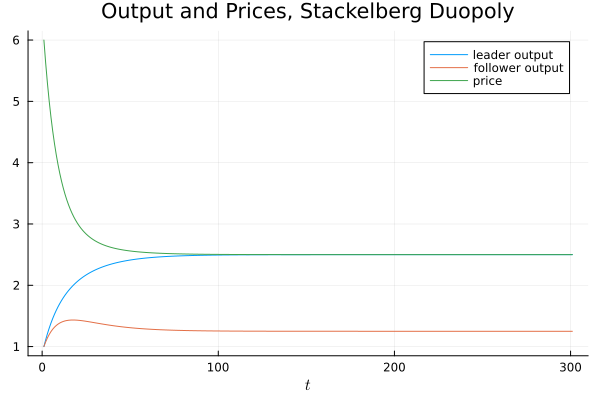

In [6]:
q_leader = yt[2, 1:end];
q_follower = yt[3, 1:end];
q = q_leader + q_follower;
p = a0 .- a1*q;

plot(1:n+1, [q_leader, q_follower, p],
    title = "Output and Prices, Stackelberg Duopoly",
    labels = ["leader output" "follower output" "price"],
    xlabel = L"t")

### Value of Stackelberg Leader

We'll compute the present value earned by the Stackelberg leader.

We'll compute it two ways (they give identical answers -- just a check
on coding and thinking)

In [7]:
v_leader_forward = sum(βs .* π_leader);
v_leader_direct = -yt[:, 1]' * P * yt[:, 1];

println("v_leader_forward (forward sim) is $v_leader_forward")
println("v_leader_direct is $v_leader_direct")

v_leader_forward (forward sim) is 150.03162125325494
v_leader_direct is 150.03237147549044


In [8]:
#test v_leader_forward ≈ 150.0316212532547
#test v_leader_direct ≈ 150.03237147548967

In [9]:
# manually check whether P is an approximate fixed point
P_next = (R + F' * Q * F + β * (A - B * F)' * P * (A - B * F));
all(P - P_next .< tol0)

true

In [10]:
#test all(P - P_next .< tol0)

In [11]:
# manually checks whether two different ways of computing the
# value function give approximately the same answer
v_expanded = -((y0' * R * y0 + ut[:, 1]' * Q * ut[:, 1] +
           β * (y0' * (A - B * F)' * P * (A - B * F) * y0)));
(v_leader_direct - v_expanded < tol0)[1, 1]

true

In [12]:
#test (v_leader_direct - v_expanded < tol0)[1, 1]

## Exhibiting Time Inconsistency of Stackelberg Plan

In the code below we compare two values

- the continuation value $- y_t P y_t$ earned by a continuation
  Stackelberg leader who inherits state $y_t$ at $t$
- the value of a **reborn Stackelberg leader** who inherits state
  $z_t$ at $t$ and sets $x_t = - P_{22}^{-1} P_{21}$

The difference between these two values is a tell-tale time of the time
inconsistency of the Stackelberg plan

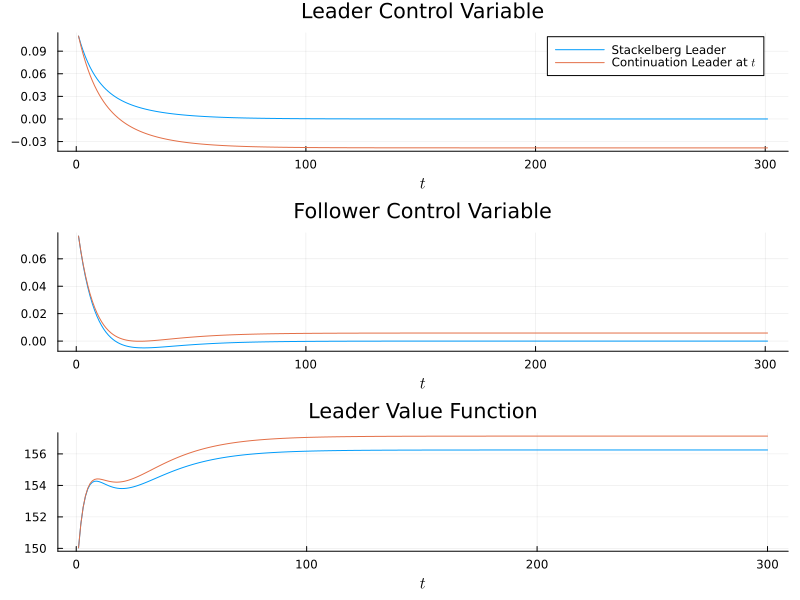

In [13]:
# Compute value function over time with reset at time t
vt_leader = zeros(n);
vt_reset_leader = similar(vt_leader);

yt_reset = copy(yt)
yt_reset[end, :] = (H_0_0 * yt[1:3, :])

for t in 1:n
    vt_leader[t] = -yt[:, t]' * P * yt[:, t]
    vt_reset_leader[t] = -yt_reset[:, t]' * P * yt_reset[:, t]
end

p1 = plot(1:n+1, [(-F * yt)', (-F * yt_reset)'], labels = ["Stackelberg Leader" L"Continuation Leader at $t$"],
        title = "Leader Control Variable", xlabel = L"t");
p2 = plot(1:n+1, [yt[4, :], yt_reset[4, :]], title = "Follower Control Variable", xlabel = L"t", legend = false);
p3 = plot(1:n, [vt_leader, vt_reset_leader], legend = false,
            xlabel = L"t", title = "Leader Value Function");
plot(p1, p2, p3, layout = (3, 1), size = (800, 600))

## Recursive Formulation of the Follower's Problem

We now formulate and compute the recursive version of the follower's
problem.

We check that the recursive **Big** $K$ **, little** $k$ formulation of the follower's problem produces the same output path
$\vec q_1$ that we computed when we solved the Stackelberg problem

In [14]:
Ã = I + zeros(5, 5);
Ã[1:4, 1:4] .= A - B * F;
R̃ = [0 0 0 0 -a0/2; 0 0 0 0 a1/2; 0 0 0 0 0; 0 0 0 0 0; -a0/2 a1/2 0 0 a1];
Q̃ = Q;
B̃ = [0, 0, 0, 0, 1];

lq_tilde = QuantEcon.LQ(Q̃, R̃, Ã, B̃, bet=β);
P̃, F̃, d̃ = stationary_values(lq_tilde);
y0_tilde = vcat(y0, y0[3]);
yt_tilde = compute_sequence(lq_tilde, y0_tilde, n)[1];

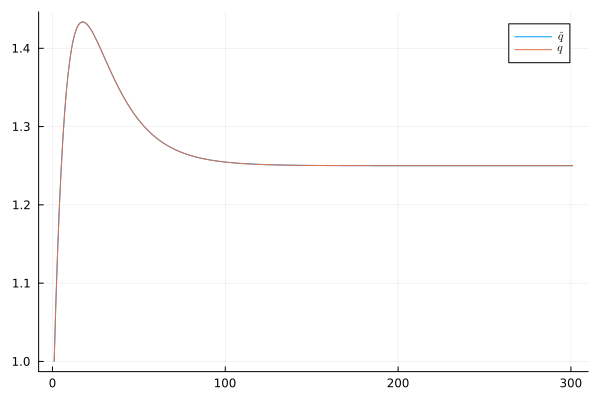

In [15]:
# checks that the recursive formulation of the follower's problem gives
# the same solution as the original Stackelberg problem
plot(1:n+1, [yt_tilde[5, :], yt_tilde[3, :]], labels = [L"\tilde{q}" L"q"])

Note: Variables with `_tilde` are obtained from solving the follower's
problem -- those without are from the Stackelberg problem.

In [16]:
# maximum absolute difference in quantities over time between the first and second solution methods
max(abs(yt_tilde[5] - yt_tilde[3]))

0.0

In [17]:
#test max(abs(yt_tilde[5] - yt_tilde[3])) ≈ 0. atol = 1e-15

In [18]:
# x0 == x0_tilde
yt[:, 1][end] - (yt_tilde[:, 2] - yt_tilde[:, 1])[end] < tol0

true

In [19]:
#test yt[:, 1][end] - (yt_tilde[:, 2] - yt_tilde[:, 1])[end] < tol0

### Explanation of Alignment

If we inspect the coefficients in the decision rule $- \tilde F$,
we can spot the reason that the follower chooses to set $x_t =
\tilde x_t$ when it sets $x_t = - \tilde F X_t$ in
the recursive formulation of the follower problem.

Can you spot what features of $\tilde F$ imply this?

Hint: remember the components of $X_t$

In [20]:
F̃ # policy function in the follower's problem

1×5 Matrix{Float64}:
 -5.73502e-17  -2.38959e-18  -0.103187  -1.0  0.103187

In [21]:
P # value function in the Stackelberg problem

4×4 Matrix{Float64}:
   963.541  -194.605   -511.622   -5258.23
  -194.605    37.3536    81.9771    784.765
  -511.622    81.9771   247.343    2517.05
 -5258.23    784.765   2517.05    25556.2

In [22]:
P̃ # value function in the follower's problem

5×5 Matrix{Float64}:
 -18.1991     2.58003     15.6049     151.23      -5.0
   2.58003   -0.969466    -5.26008    -50.9764     1.0
  15.6049    -5.26008    -32.2759    -312.792    -12.3824
 151.23     -50.9764    -312.792    -3031.33    -120.0
  -5.0        1.0        -12.3824    -120.0       14.3824

In [23]:
# manually check that P is an approximate fixed point
all((P  - ((R + F' * Q * F) + β * (A - B * F)' * P * (A - B * F)) .< tol0))

true

In [24]:
#test all((P  - ((R + F' * Q * F) + β * (A - B * F)' * P * (A - B * F)) .< tol0))

In [25]:
# compute `P_guess` using `F_tilde_star`
F̃_star = -[0, 0, 0, 1, 0]';
P_guess = zeros(5, 5);

for i in 1:1000
    P_guess = ((R̃ + F̃_star' * Q̃ * F̃_star) +
               β * (Ã - B̃ * F̃_star)' * P_guess
               * (Ã - B̃ * F̃_star));
end

In [26]:
# value function in the follower's problem
-(y0_tilde' * P̃ * y0_tilde)[1, 1]

112.655907405782

In [27]:
@test -(y0_tilde' * P̃ * y0_tilde)[1, 1] ≈ 112.65590740578173

Test Passed

In [28]:
# value function using P_guess
-(y0_tilde' * P_guess * y0_tilde)[1, 1]

112.65590740578187

In [29]:
@test -(y0_tilde' * P_guess * y0_tilde)[1, 1] ≈ 112.65590740578186

Test Passed

In [30]:
# c policy using policy iteration algorithm
F_iter = (β * inv(Q + β * B̃' * P_guess * B̃)
      * B̃' * P_guess * Ã);
P_iter = zeros(5, 5);
dist_vec = zeros(5, 5);

for i in 1:100
    # compute P_iter
    dist_vec = similar(P_iter)
    for j in 1:1000
        P_iter = (R̃ + F_iter' * Q * F_iter) + β *
                  (Ã - B̃ * F_iter)' * P_iter *
                  (Ã - B̃ * F_iter);

        # update F_iter
        F_iter = β * inv(Q + β * B̃' * P_iter * B̃) *
                    B̃' * P_iter * Ã;

        dist_vec = P_iter - ((R̃ + F_iter' * Q * F_iter) +
                β * (Ã - B̃ * F_iter)' * P_iter *
                (Ã - B̃ * F_iter));
    end
end

if maximum(abs.(dist_vec)) < 1e-8
    dist_vec2 = F_iter - (β * inv(Q + β * B̃' * P_iter * B̃) * B̃' * P_iter * Ã)
        if maximum(abs.(dist_vec2)) < 1e-8
            @show F_iter
        else
            println("The policy didn't converge: try increasing the number of outer loop iterations")
        end
else
    println("The policy didn't converge: try increasing the number of inner loop iterations")
end

F_iter = [4.85722573273506e-17 -1.9949319973733282e-17 -0.10318650145223833 -1.000000000000001 0.1031865014522382]


1×5 adjoint(::Vector{Float64}) with eltype Float64:
 4.85723e-17  -1.99493e-17  -0.103187  -1.0  0.103187

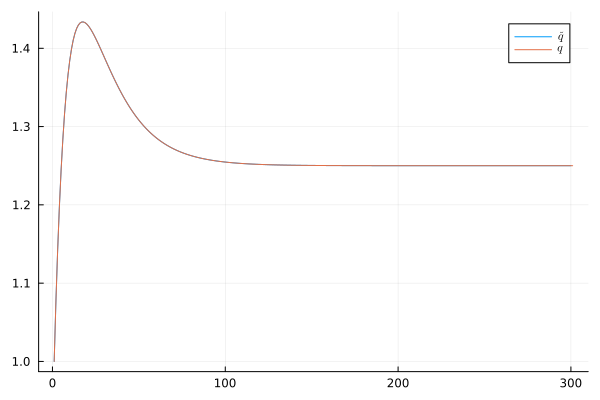

In [31]:
yt_tilde_star = zeros(n, 5);
yt_tilde_star[1, :] = y0_tilde;

for t in 1:n-1
    yt_tilde_star[t+1, :] = (Ã - B̃ * F̃_star) * yt_tilde_star[t, :];
end

plot([yt_tilde_star[:, 5], yt_tilde[3, :]], labels = [L"\tilde{q}" L"q"])

In [32]:
maximum(abs.(yt_tilde_star[:, 5] - yt_tilde[3, 1:end-1]))

0.0

In [33]:
#test maximum(abs.(yt_tilde_star[:, 5] - yt_tilde[3, 1:end-1])) < 1e-15

## Markov Perfect Equilibrium

The **state** vector is

$$
z_t = \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t} \end{bmatrix}
$$

and the state transition dynamics are

$$
z_{t+1} = A z_t + B_1 v_{1t}  +  B_2 v_{2t}
$$

where $A$ is a $3 \times 3$ identity matrix and

$$
B_1 = \begin{bmatrix} 0 \cr 0 \cr 1 \end{bmatrix} ,
\quad B_2 = \begin{bmatrix} 0 \cr 1 \cr 0 \end{bmatrix}
$$

The Markov perfect decision rules are

$$
v_{1t} = - F_1 z_t , \quad v_{2t} = - F_2 z_t
$$

and in the Markov perfect equilibrium the state evolves according to

$$
z_{t+1} = (A - B_1 F_1 - B_2 F_2) z_t
$$

In [34]:
# in LQ form
A = I + zeros(3, 3);
B1 = [0, 0, 1];
B2 = [0, 1, 0];
R1 = [0 0 -a0/2; 0 0 a1/2; -a0/2 a1/2 a1];
R2 = [0 -a0/2 0; -a0/2 a1 a1/2; 0 a1/2 0];
Q1 = Q2 = γ;
S1 = S2 = W1 = W2 = M1 = M2 = 0.;

# solve using nnash from QE
F1, F2, P1, P2 = nnash(A, B1, B2, R1, R2, Q1, Q2,
                        S1, S2, W1, W2, M1, M2,
                        beta = β,
                        tol = tol1);

# simulate forward
AF = A - B1 * F1 - B2 * F2;
z = zeros(3, n);
z[:, 1] .= 1;
for t in 1:n-1
    z[:, t+1] = AF * z[:, t]
end

println("Policy for F1 is $F1")
println("Policy for F2 is $F2")

Policy for F1 is [-0.22701362843207126 0.03129874118441059 0.09447112842804818]
Policy for F2 is [-0.22701362843207126 0.09447112842804818 0.03129874118441059]


In [35]:
#test round(F1[1], digits = 4) == -0.227
#test round(F2[2], digits = 4) == 0.0945

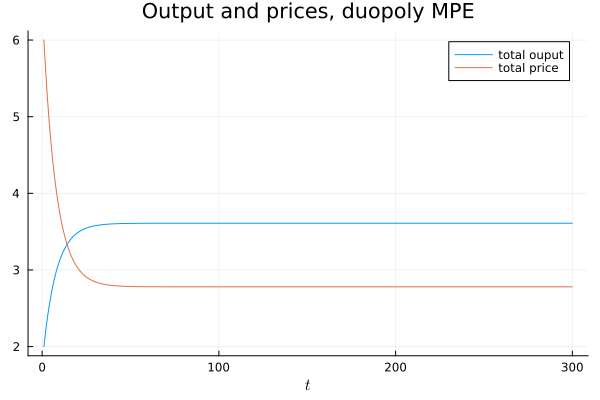

In [36]:
q1 = z[2, :];
q2 = z[3, :];
q = q1 + q2; # total output, MPE
p = a0 .- a1 * q; # total price, MPE
plot([q, p], labels = ["total ouput" "total price"], title = "Output and prices, duopoly MPE", xlabel = L"t")

In [37]:
# computes the maximum difference in quantities across firms
maximum(abs.(q1 - q2))

1.9984014443252818e-15

In [38]:
@test maximum(abs.(q1 - q2)) < 1e-14

Test Passed

In [39]:
# compute values
u1 = -F1 * z;
u2 = -F2 * z;
π_1 = (p .* q1)' - γ * u1.^2;
π_2 = (p .* q2)' - γ * u2.^2;

v1_forward = π_1 * βs;
v2_forward = π_2 * βs;

v1_direct = -z[:, 1]' * P1 * z[:, 1];
v2_direct = -z[:, 1]' * P2 * z[:, 1];

println("Firm 1: Direct is $v1_direct, Forward is $(v1_forward[1])");
println("Firm 2: Direct is $v2_direct, Forward is $(v2_forward[1])");

Firm 1: Direct is 133.32949812474203, Forward is 133.33033197956638
Firm 2: Direct is 133.32949812474203, Forward is 133.3303319795664


In [40]:
#test round(v1_direct, digits = 4) == 133.3296
#test round(v2_direct, digits = 4) == 133.3296
#test round(v1_forward[1], digits = 4) == 133.3303
#test round(v2_forward[1], digits = 4) == 133.3303

In [41]:
# sanity check
Λ_1 = A - B2 * F2;
lq1 = QuantEcon.LQ(Q1, R1, Λ_1, B1, bet = β);
P1_ih, F1_ih, d = stationary_values(lq1);

v2_direct_alt = -z[:, 1]' * P1_ih * z[:, 1] + d;
all(abs.(v2_direct - v2_direct_alt) < tol2)

true

## MPE vs. Stackelberg

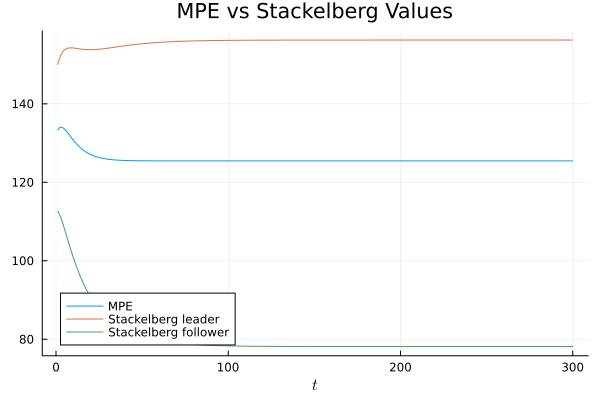

In [42]:
vt_MPE = zeros(n);
vt_follower = zeros(n);

for t in 1:n
    vt_MPE[t] = -z[:, t]' * P1 * z[:, t];
    vt_follower[t] = -yt_tilde[:, t]' * P̃ * yt_tilde[:, t];
end

plot([vt_MPE, vt_leader, vt_follower], labels = ["MPE" "Stackelberg leader" "Stackelberg follower"], 
        title = "MPE vs Stackelberg Values",
        xlabel = L"t")

In [43]:
# display values
println("vt_leader(y0) = $(vt_leader[1])");
println("vt_follower(y0) = $(vt_follower[1])")
println("vt_MPE(y0) = $(vt_MPE[1])");

vt_leader(y0) = 150.03237147549044
vt_follower(y0) = 112.655907405782
vt_MPE(y0) = 133.32949812474203


In [44]:
# total difference in value b/t Stackelberg and MPE
vt_leader[1] + vt_follower[1] - 2*vt_MPE[1]

-3.9707173682116377

In [45]:
@test round(vt_leader[1] + vt_follower[1] - 2*vt_MPE[1], digits = 4) == -3.9707

Test Passed